In [49]:
import params
import curveTreeDB
allModels = curveTreeDB.getModels(params.treeModels, ticker = None, returnEntireObject = True)

In [50]:
import pandas as pd
cleanedModels = []
for item in allModels:
#     if item["minConfidence"] != 0.2:
#         continue
    if item["IS_TOTAL DAYS SEEN"] < 2000:
        continue
    del item["model"]
    try:
        del item["series"]
    except:
        pass
#     del item["ticker"]
    itemKeys= list(item.keys())
    for key in itemKeys:
        if key.startswith("OOS") and key != "OOS_SHARPE" and key != "OOS_SHARPE SLIPPAGE":
            del item[key]
    cleanedModels.append(item)


In [51]:
len(cleanedModels)

89

IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE


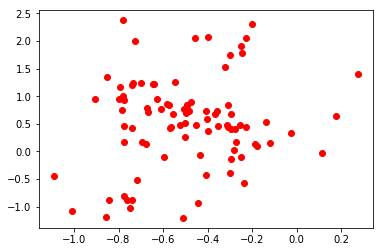

IS_25TH PERCENTILE SHARPE


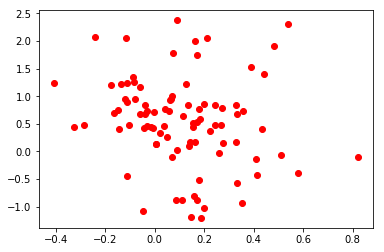

IS_25TH PERCENTILE SHARPE DIFFERENCE


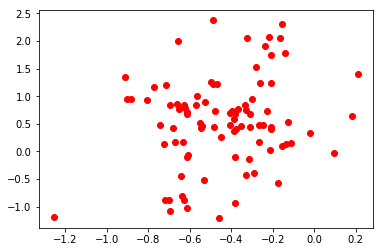

IS_ACTIVITY


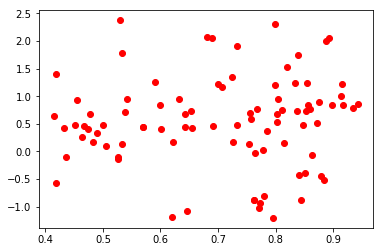

IS_ALPHA


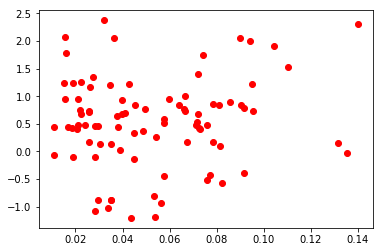

IS_ALPHA SLIPPAGE


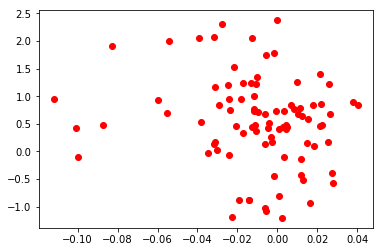

IS_ANNUALIZED RETURN


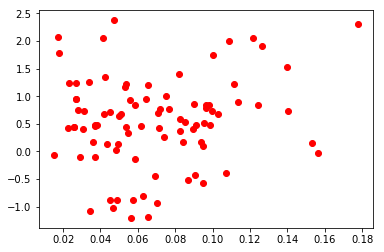

IS_BETA


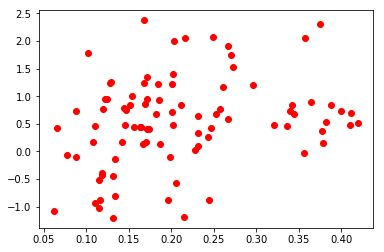

IS_EXTREME STABILITY


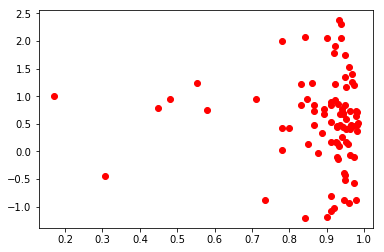

IS_EXTREME STABILITY ROLLING 600


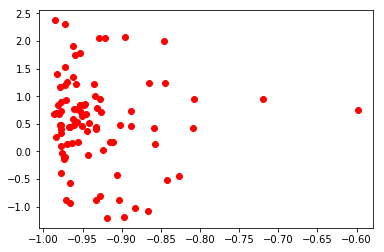

IS_FACTOR SHARPE


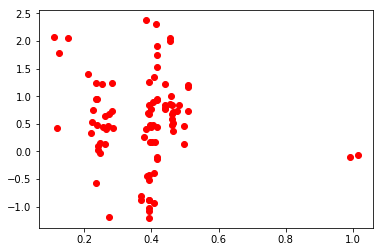

IS_MIN ROLLING SHARPE


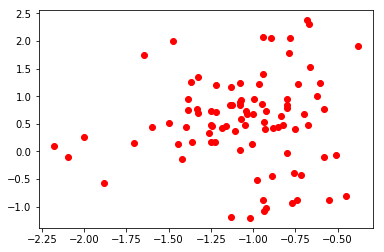

IS_ONE STD SHARPE


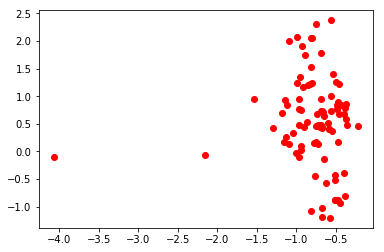

IS_RAW BETA


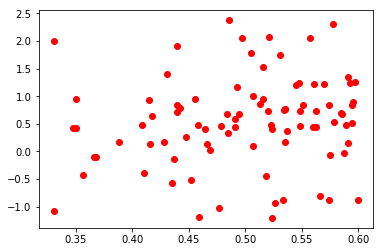

IS_RELATIVE SHARPE


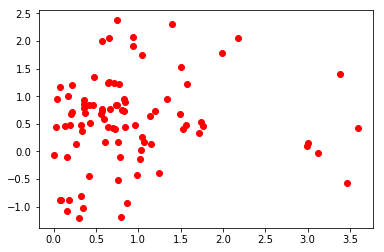

IS_RELATIVE SHARPE DIFFERENCE AVERAGE


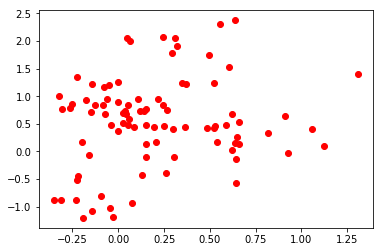

IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0


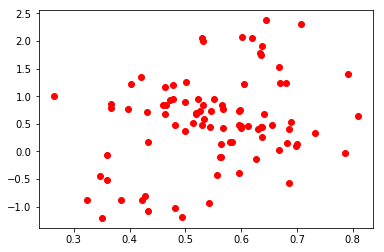

IS_RELATIVE SHARPE DIFFERENCE MIN


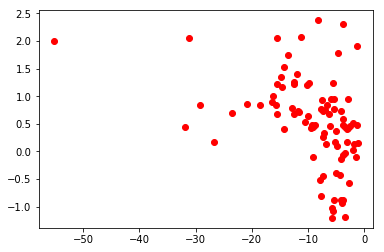

IS_RELATIVE SHARPE SLIPPAGE


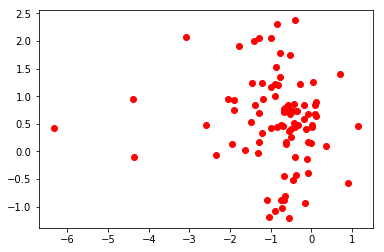

IS_ROLLING SHARPE BETA


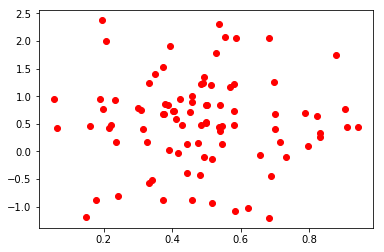

IS_ROLLING SHARPE ERROR


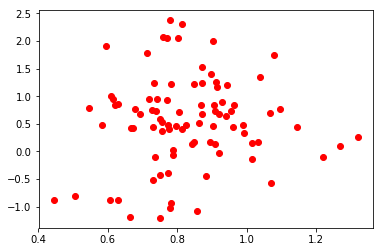

IS_ROLLING SHARPE STABILITY


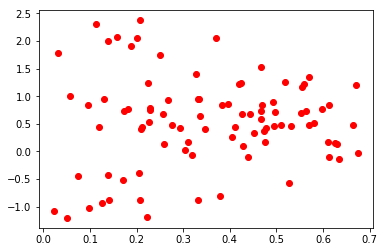

IS_SHARPE


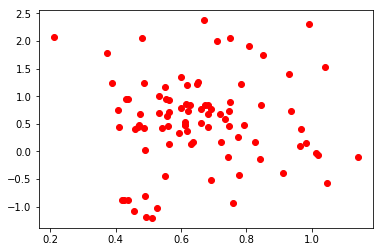

IS_SHARPE DIFFERENCE


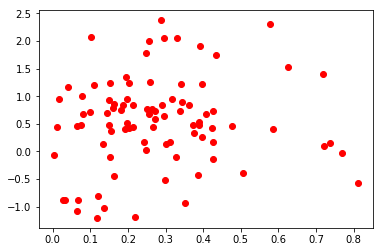

IS_SHARPE DIFFERENCE AVERAGE


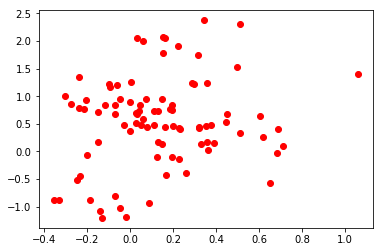

IS_SHARPE DIFFERENCE GREATER THAN 0


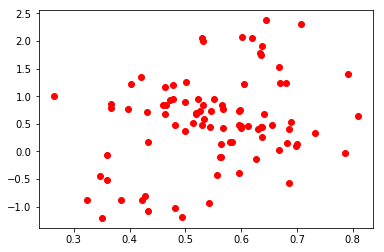

IS_SHARPE DIFFERENCE MIN


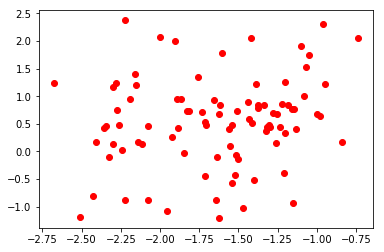

IS_SHARPE DIFFERENCE SLIPPAGE


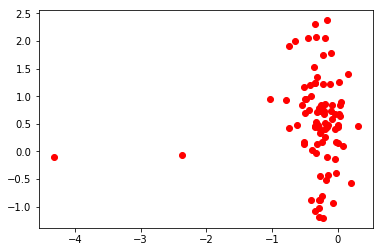

IS_SHARPE SLIPPAGE


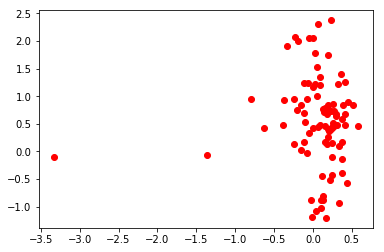

IS_SHARPE SLIPPAGE DECAY


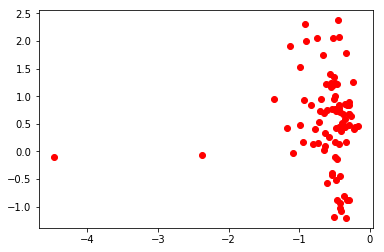

IS_SMART INFORMATION RATIO


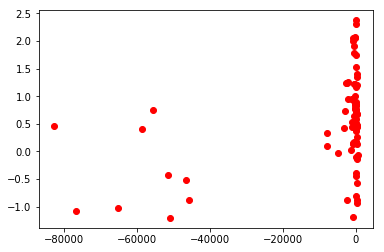

IS_STABILITY


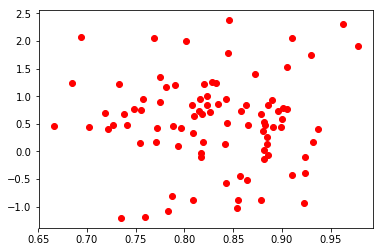

IS_TOTAL DAYS SEEN


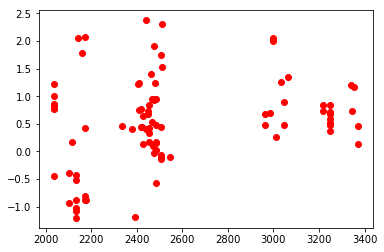

IS_TREYNOR


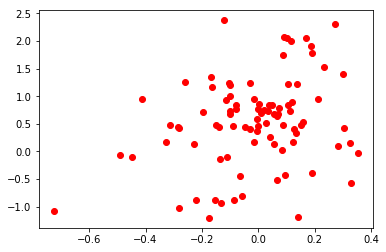

OOS_SHARPE


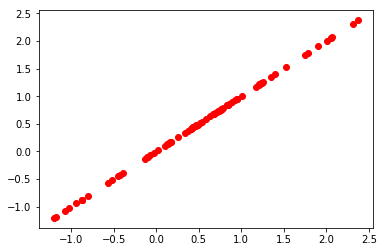

OOS_SHARPE SLIPPAGE


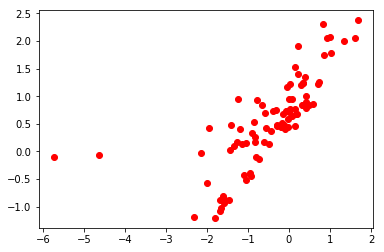

combiner
combiner
AND    0.529204
OR     0.546962
Name: OOS_SHARPE, dtype: float64
combiner
AND   -0.391055
OR    -0.493098
Name: OOS_SHARPE SLIPPAGE, dtype: float64
combiner
AND   -0.805210
OR    -1.197057
Name: OOS_SHARPE SLIPPAGE, dtype: float64
numberOfPredictors
numberOfPredictors
2    0.541774
Name: OOS_SHARPE, dtype: float64
numberOfPredictors
2   -0.463288
Name: OOS_SHARPE SLIPPAGE, dtype: float64
numberOfPredictors
2   -1.060579
Name: OOS_SHARPE SLIPPAGE, dtype: float64


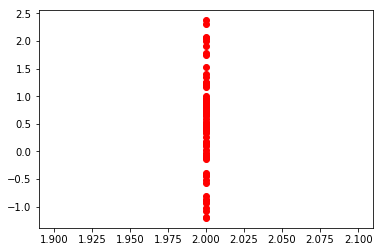

predictionLength
predictionLength
2     0.858706
3     0.591070
5     0.631587
7     0.233893
10    0.761638
Name: OOS_SHARPE, dtype: float64
predictionLength
2    -1.530618
3    -0.632060
5    -0.177051
7    -0.390639
10   -0.514834
Name: OOS_SHARPE SLIPPAGE, dtype: float64
predictionLength
2    -1.999244
3    -1.219321
5    -0.592087
7    -1.060579
10    0.018873
Name: OOS_SHARPE SLIPPAGE, dtype: float64


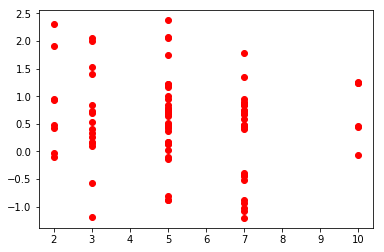

ticker
ticker
AGG   -0.084734
EWC    0.705390
IWM    1.412994
IYR   -0.747680
IYT    0.954848
Name: OOS_SHARPE, dtype: float64
ticker
AGG   -5.187836
EWC   -0.279636
IWM    0.559452
IYR   -1.447348
IYT    0.068082
Name: OOS_SHARPE SLIPPAGE, dtype: float64
ticker
AGG   -5.463780
EWC   -0.590268
IWM    0.033667
IYR   -1.668843
IYT   -0.599179
Name: OOS_SHARPE SLIPPAGE, dtype: float64


In [52]:
cm = pd.DataFrame(cleanedModels)
for col in cm.columns.values:
    print(col)
    try:
        import matplotlib.pyplot as plt
        groupsSharpe = cm.groupby([col])["OOS_SHARPE"].mean()
        groupsSharpeSlippage = cm.groupby([col])["OOS_SHARPE SLIPPAGE"].mean()
        groupsQuantile =cm.groupby([col])["OOS_SHARPE SLIPPAGE"].quantile(q=0.25)
        if len(groupsSharpe) < 10:
            print(groupsSharpe)
            print(groupsSharpeSlippage)
            print(groupsQuantile)
        xVals = cm[[col]].values
        yVals = cm[["OOS_SHARPE"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        plt.draw()
    except:
        continue
    

